DOMAIN: Sports

CONTEXT: Company X manages the men's top professional basketball division of the American league system.
The dataset contains information on all the teams that have participated in all the past tournaments. It has data
about how many baskets each team scored, conceded, how many times they came within the first 2 positions,
how many tournaments they have qualified, their best position in the past, etc

PROJECT OBJECTIVE: Company’s management wants to invest on proposal on managing some of the best
teams in the league. The analytics department has been assigned with a task of creating a report on the
performance shown by the teams. Some of the older teams are already in contract with competitors. Hence
Company X wants to understand which teams they can approach which will be a deal win for them

In [71]:
#reading an raw data file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

basketball  = pd.read_csv("E:\\GL\\DS - Part2 - Basketball.csv")
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1932,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [72]:
##Identify duplicates records in the data
dupes = basketball.duplicated()
sum(dupes)

0

In [73]:
# column names
basketball.dtypes

Team                   object
Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion     object
Runner-up              object
TeamLaunch              int64
HighestPositionHeld     int64
dtype: object

In [74]:
#Treating Unwanted values and replacing required values

basketball["TournamentChampion"]= basketball["TournamentChampion"].str.replace("-", "0")
basketball["Runner-up"]= basketball["Runner-up"].str.replace("-", "0")

basketball.tail()


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,0,0,2017,17
56,Team 57,1,34,38,8,10,20,38,66,0,0,2010,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1957,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1952,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1956,15


In [75]:
# treating Missing values

basketball.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
basketball.isnull().sum()


Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [76]:
# data structure:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
Team                   60 non-null object
Tournament             60 non-null int64
Score                  60 non-null int64
PlayedGames            60 non-null int64
WonGames               60 non-null int64
DrawnGames             60 non-null int64
LostGames              60 non-null int64
BasketScored           60 non-null int64
BasketGiven            60 non-null int64
TournamentChampion     60 non-null object
Runner-up              60 non-null object
TeamLaunch             60 non-null int64
HighestPositionHeld    60 non-null int64
dtypes: int64(10), object(3)
memory usage: 6.6+ KB


In [77]:
# to summarize data frame
analysis=basketball.describe()
pd.DataFrame(analysis)

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1958.766667,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,26.807137,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1935.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,1951.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,1978.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,2017.000000,20.000000


In [64]:
# exploring categorical variables:

for table in ['Tournament', 'Score', 'PlayedGames', 'WonGames','DrawnGames','LostGames',
              'BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']:
    basketball[table] = basketball[table].astype('category')
    
ball_vars = basketball.select_dtypes(include=['category']).columns.tolist()
ball_vars=list(ball_vars)

for i in ball_vars:
    x=basketball[i].value_counts() 
    print(x)

1     5
4     5
12    4
2     4
3     4
6     3
86    3
17    2
7     2
9     2
82    2
11    2
51    2
14    1
80    1
73    1
70    1
5     1
58    1
13    1
45    1
44    1
18    1
20    1
21    1
27    1
33    1
36    1
37    1
38    1
42    1
43    1
23    1
Name: Tournament, dtype: int64
4385    1
4262    1
343     1
293     1
285     1
277     1
242     1
230     1
190     1
188     1
168     1
150     1
148     1
132     1
107     1
96      1
91      1
83      1
81      1
76      1
71      1
56      1
52      1
42      1
40      1
35      1
34      1
22      1
19      1
353     1
375     1
416     1
1389    1
3442    1
3386    1
3368    1
2819    1
2792    1
2573    1
2109    1
1884    1
1814    1
1789    1
1471    1
1416    1
1351    1
421     1
1314    1
1174    1
1148    1
1020    1
970     1
667     1
662     1
606     1
553     1
538     1
510     1
445     1
14      1
Name: Score, dtype: int64
2762    3
30      3
38      2
68      2
80      2
114     2
2626    1
186     1

In [78]:
# checking if missing values exist?
    

basketball.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [93]:
basketball.nlargest(5, ['Score']) # five largest values in column Score

#Top scorer team data can be analysed

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1932,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


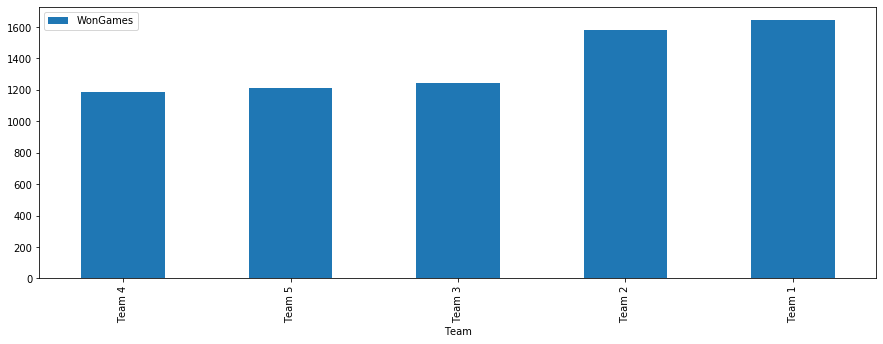

In [95]:
#Bar plot to check Number of WonGames by top Teams

basketball.groupby(by=['Team'])['WonGames'].sum().reset_index().sort_values(['WonGames']).tail(5).plot(x='Team',
                                                                                                           y='WonGames',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

#Where Team 1 and Team 2 have won the maximum number of games

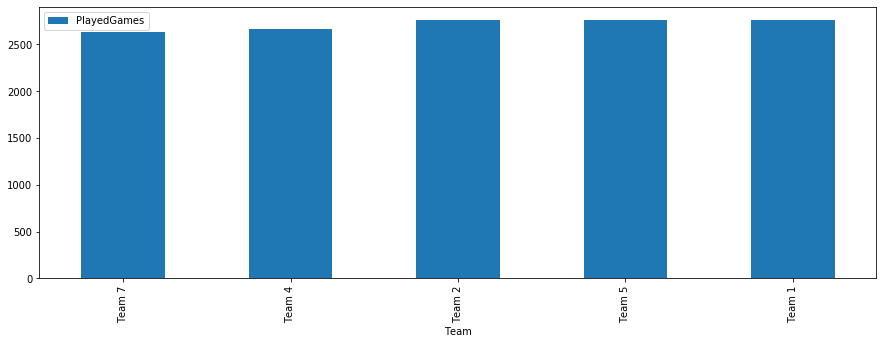

In [100]:
#Bar plot to check Number of PlayedGames by top Teams


basketball.groupby(by=['Team'])['PlayedGames'].sum().reset_index().sort_values(['PlayedGames']).tail(5).plot(x='Team',
                                                                                                           y='PlayedGames',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

#Also Team 1 and Team 2 has played maximum number of games

We can Conclude that Team 1 and Team 2 are the best team for investment for company X

3. If there would have been a historical data of every team and there performance data of past 5 to 10 years, the out comes would have been some what precise in nature as for every team outcome would have been drawn seperatly from historical data.